##### Notebook created in virtual environemt with spacy version 2.3.5

## Importing Libraries and Reading Data

In [128]:
import numpy as np
import pandas as pd
import string
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import spacy
from scripts_spacy import train_model
from sklearn import metrics
import srsly

In [3]:
# Importing dataset
df=pd.read_csv('/home/hp/Desktop/data.csv')

## Analysis of Data

In [4]:
print("Shape of data => ",df.shape)

Shape of data=> (18899, 3)


In [5]:
#Missing Data
df.isnull().sum()

textID       0
text         1
sentiment    0
dtype: int64

In [6]:
#Dropping missing values
df.dropna(inplace=True)
df.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [7]:
df.sentiment.value_counts(normalize=True)[0]

0.5882633082865911

In [8]:
df.sentiment.value_counts(normalize=True)[1]

0.4117366917134088

## Graph showing percentage of negative and neutral in data

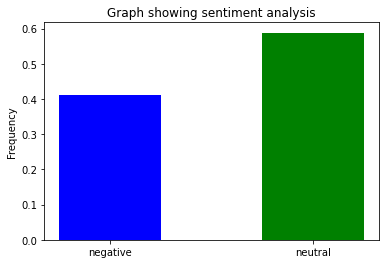

In [9]:
fig,axis=plt.subplots()
axis.bar(["negative","neutral"],[0.4117366917134088,0.5882633082865911],width=0.5,color=["blue","green"])
axis.set_title ("Graph showing sentiment analysis")
axis.set_ylabel("Frequency")
plt.show()

## Data snippet

In [10]:
for index,text in enumerate(df['text'][30:40]):
  print('Text %d:\n'%(index+1),text)

Text 1:
  unfortunately, I will miss Girl Bros. Radio tonight. Will be in the midst of an all night writing session
Text 2:
 there`s no point in bein on here if no one else in on
Text 3:
 going to jack`s tribute match today
Text 4:
 possibly a carpenters number,topical.
Text 5:
 Wowzer! It`s very windy. Not good for my allergies!!
Text 6:
 my mom wants to lay. We`ll be there later. Probably a little after 10. And  I`m sorry you`re sick
Text 7:
 Sometimes knowledge is not a good thing.    http://digg.com/d1sPp7
Text 8:
 - me and my mom`s cars were broken into.  I feel violated.
Text 9:
 we are going all out!
Text 10:
 _m do it up


## Splitting Data into Train, Test and Val in 8:1:1 ratio

In [13]:
df.replace(to_replace=["neutral","negative"],value=[0,1],inplace=True)

In [14]:
X = df["text"]
Y = df["sentiment"]

x, x_test, y, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=1/9, random_state=42)

In [15]:
len(x_train)

15118

In [16]:
len(x_test)

1890

In [17]:
len(x_val)

1890

## Training the model

##### Dowloaded en_core_web_md model

In [20]:
model ="en_core_web_md"
train_path="train.jsonl"
eval_path="val.jsonl"
n_iter=10
output="train_model_pre_vectorslg"
tok2vec="tok2vec_cd8_model289.bin"

In [21]:
train_model(model,train_path,eval_path,n_iter=n_iter,output=output,tok2vec=tok2vec)

ading 'en_core_web_md'...

  0%|          | 2/15118 [00:00<15:57, 15.78it/s]

✔ Loaded model 'en_core_web_md'
#    L          F       


  0%|          | 0/15118 [00:00<?, ?it/s]            

1    371.07     0.825   


  0%|          | 0/15118 [00:00<?, ?it/s]            

2    0.57       0.847   


  0%|          | 0/15118 [00:00<?, ?it/s]            

3    0.50       0.854   


  0%|          | 0/15118 [00:00<?, ?it/s]            

4    0.44       0.859   


  0%|          | 0/15118 [00:00<?, ?it/s]            

5    0.39       0.863   


  0%|          | 0/15118 [00:00<?, ?it/s]            

6    0.34       0.866   


  0%|          | 0/15118 [00:00<?, ?it/s]              

7    0.29       0.861   


  0%|          | 0/15118 [00:00<?, ?it/s]            

8    0.26       0.859   


  0%|          | 0/15118 [00:00<?, ?it/s]            

9    0.22       0.856   


10   0.19       0.856   
Best F-Score: 0.866
ving model...✔ Saved model
train_model_pre_vectorslg


Model Trained with best F1_Score of 0.866 and saved

## Loading Model and finding F1_Score using evaluate_model from Scripts_spacy

In [171]:
from scripts_spacy import evaluate_model
from scripts_spacy import format_data
evaluate_model("train_model_pre_vectorslg","test.jsonl")

ading model 'train_model_pre_vectorslg'...
F-Score   0.847



In [63]:
model=spacy.load("train_model_pre_vectorslg")

## Displaying sample data in test_jsonl

In [48]:
x,y=format_data(srsly.read_jsonl("test.jsonl"))

In [49]:
for i in range(10):
    print(x[i])

('soooo over ppl telling me they went to the tonite show!!!  Ive had dreams of meeting him  I`m embarrassd of that a lil LOL', {'cats': {'NEGATIVE': True}})
('who what?  call me', {'cats': {'NEGATIVE': False}})
('I`ve got sunburnt knees... it`s funny now, but I bet they`ll sting later   Had a fab day though  x', {'cats': {'NEGATIVE': False}})
('Hicks are mean!', {'cats': {'NEGATIVE': True}})
(' -- No fair, I want a sticker but I just moved away from London', {'cats': {'NEGATIVE': True}})
('going out to see star trek   be back in a while', {'cats': {'NEGATIVE': False}})
('Hoping that this will just heal on it`s own because anything I put on it just makes it worse. Owww', {'cats': {'NEGATIVE': False}})
('wants to go the the vintage paper show but no one will accompany her', {'cats': {'NEGATIVE': True}})
('nothinbg home about to jump in the shower the streets is calling meeeeeeee   what is it 4 tonight  tell m', {'cats': {'NEGATIVE': False}})
("I actually meant to type 'end of September' 

In [93]:
x_test[0:10]

12502    soooo over ppl telling me they went to the ton...
11125                                   who what?  call me
8733     I`ve got sunburnt knees... it`s funny now, but...
7747                                       Hicks are mean!
13103     -- No fair, I want a sticker but I just moved...
15622      going out to see star trek   be back in a while
7077     Hoping that this will just heal on it`s own be...
9141     wants to go the the vintage paper show but no ...
10813    nothinbg home about to jump in the shower the ...
42       I actually meant to type 'end of September' bu...
Name: text, dtype: object

In [125]:
y_test[0:10]

12502    1
11125    0
8733     0
7747     1
13103    1
15622    0
7077     0
9141     1
10813    0
42       0
Name: sentiment, dtype: int64

## Testing model prediction with random input sentence 

In [103]:
sentence=model("hello, how are you?")

In [104]:
sentence.cats

{'NEGATIVE': 0.023059643805027008}

#### As the value of label is very low, it is not negative (neutral)

In [97]:
model.pipe_names

['tagger', 'parser', 'ner', 'textcat']

## Predicting text sentiment of x_test data and storing in y_pred

In [123]:
y_pred=[]
for string in x_test:
    doc=model(string)
    neg_index=doc.cats
    #print(neg_index)
    if neg_index["NEGATIVE"]>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(y_pred[0:10])

[0, 0, 1, 1, 0, 0, 1, 0, 0, 0]


In [118]:
print(y_test[0:10])

12502    1
11125    0
8733     0
7747     1
13103    1
15622    0
7077     0
9141     1
10813    0
42       0
Name: sentiment, dtype: int64


## Evaluating metrics like accuracy and F1_Score on TEST data

In [168]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.7761904761904762


In [170]:
f_score=metrics.f1_score(y_test,y_pred)
print("F1_Score: ",f_score)

F1_Score:  0.7327858496525584


## Confusion Matrix

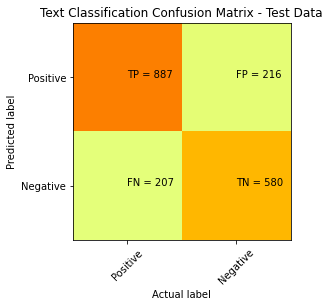

In [116]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Positive','Negative']
plt.title('Text Classification Confusion Matrix - Test Data')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TP','FP'], ['FN', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [127]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1103
           1       0.73      0.74      0.73       787

    accuracy                           0.78      1890
   macro avg       0.77      0.77      0.77      1890
weighted avg       0.78      0.78      0.78      1890



## Incorrectly Predicted Text

In [164]:
wrong_pred=[]
for i in range(len(x_test)):
    if (y_test[i:i+1]!=y_pred[i]).bool()==1:
        wrong_pred.append(x[i])
print("INCORRECT TEXT PREDICTIONS ARE AS FOLLOWS: \n")
print("FALSE POSITIVES ARE: 216")
print("FALSE NEGATIVES ARE: 207\n")
wrong_pred[:10]   

INCORRECT TEXT PREDICTIONS ARE AS FOLLOWS: 

FALSE POSITIVES ARE: 216
FALSE NEGATIVES ARE: 207



[('soooo over ppl telling me they went to the tonite show!!!  Ive had dreams of meeting him  I`m embarrassd of that a lil LOL',
  {'cats': {'NEGATIVE': True}}),
 ('I`ve got sunburnt knees... it`s funny now, but I bet they`ll sting later   Had a fab day though  x',
  {'cats': {'NEGATIVE': False}}),
 (' -- No fair, I want a sticker but I just moved away from London',
  {'cats': {'NEGATIVE': True}}),
 ('Hoping that this will just heal on it`s own because anything I put on it just makes it worse. Owww',
  {'cats': {'NEGATIVE': False}}),
 ('wants to go the the vintage paper show but no one will accompany her',
  {'cats': {'NEGATIVE': True}}),
 ('waaa the octo drive and i can`t go for it', {'cats': {'NEGATIVE': True}}),
 ('_steph boo  I miss you! It`s been ages. Once I get Internet back I`ll try to fix ALO haha it likes to act up from time to time...',
  {'cats': {'NEGATIVE': False}}),
 (' Awe man, that sucks. Everyone makes mistakes. I have a feeling that people can forgive you',
  {'cats':

## Analysis of wrong predictions

In [167]:
wrong_negative_index=[]
for text,sentiment in wrong_pred:
    doc=model(text)
    wrong_negative_index.append(doc.cats["NEGATIVE"])

print("Here I am showing the negative indices of the values wrongly predicted and storing them in a list.")
wrong_negative_index[:10]

Here I am showing the negative indices of the values wrongly predicted and storing them in a list.


[0.02403394877910614,
 0.8351126313209534,
 0.39563044905662537,
 0.8135517835617065,
 0.03563077002763748,
 0.4708297550678253,
 0.6155261397361755,
 0.7961817979812622,
 0.1510336697101593,
 0.308573454618454]

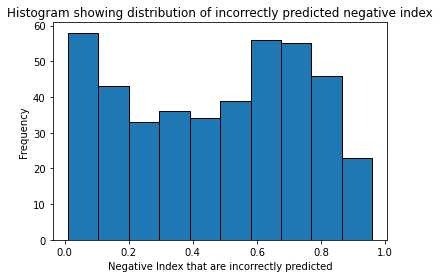

In [163]:
%matplotlib inline

plt.hist(wrong_negative_index,10,edgecolor="k")
plt.xlabel("Negative Index that are incorrectly predicted")
plt.ylabel("Frequency")
plt.title("Histogram showing distribution of incorrectly predicted negative index")

plt.show()

## Inferences:

#### 1. The model causes maximum error in prediction in the range of (0-0.1), (0.6-0.82)
This means that the model is weak in determining very neutral sentences and also is poor for slightly negative sentences.
#### 2. Among wrong predictions, the least are present in the range (0.9-1)
Very negative sentences are predicted better by the model


## To enhance performance of Text Classification model:
#### 1. Use of exhaustive stop word list
#### 2. Removing urls, numerical values
#### 3. Eliminating words with very low frequency
#### 4. Lemmatizing the text

Source: https://www.analyticsvidhya.com/blog/2015/10/6-practices-enhance-performance-text-classification-model/  
Reference is too old!!